## BlueTides Mock Image Catalogue - Example Codes
This code walks through the steps to 
- read the 'BlueTidesMockImageCatalogue.csv' file
- select BlueTides galaxies based on their properties
- plot these galaxies in a range of telescopes and filters
This code can be used to reproduce the images in Figures 2 and 3 of the Mock Catalogue Release paper.


Note that the key functions can be found in bluetides_mock_catalogue_functions if you wish to make any modifications. If bluetides_mock_catalogue_functions is not in the current directory, you will need to add its directory to your PYTHONPATH.




To run this code as-is, this requires the files:

- hlsp_bluetides_multi_multi_all_multi_v1_sim.csv  


- hlsp_bluetides_jwst_nircam_z7-file1_f090w_v1_sim-psf.fits
- hlsp_bluetides_jwst_nircam_z7-file1_f115w_v1_sim-psf.fits
- hlsp_bluetides_jwst_nircam_z7-file1_f150w_v1_sim-psf.fits
- hlsp_bluetides_jwst_nircam_z7-file1_f200w_v1_sim-psf.fits
- hlsp_bluetides_jwst_nircam_z7-file1_f277w_v1_sim-psf.fits
- hlsp_bluetides_jwst_nircam_z7-file1_f356w_v1_sim-psf.fits
- hlsp_bluetides_jwst_nircam_z7-file1_f410m_v1_sim-psf.fits
- hlsp_bluetides_jwst_nircam_z7-file1_f444w_v1_sim-psf.fits
- hlsp_bluetides_jwst_miri_z7-file1_f560w_v1_sim-psf.fits
- hlsp_bluetides_jwst_miri_z7-file1_f770w_v1_sim-psf.fits  


- hlsp_bluetides_hst_wfc3_z7-file1_f105w_v1_sim-psf.fits
- hlsp_bluetides_roman_wfi_z7-file1_f106_v1_sim-psf.fits
- hlsp_bluetides_euclid_nisp_z7-file1_y_v1_sim-psf.fits
- hlsp_bluetides_vista_vircam_z7-file1_y_v1_sim-psf.fits
- hlsp_bluetides_subaru_hsc_z7-file1_y_v1_sim-psf.fits

For a less download-intensive test, download the z=12 files (replace z7-file1 with z12), and change to z=12 in the cell 2 below.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
from astropy.io import fits

import bluetides_mock_catalogue_functions as mock_functions

Select redshift. We will consider z=7, but z=8,9,10,11 and 12 are also available.

In [2]:
z=7

Load in the catalogue as a Catalogue object. This requires specifying the directory which contains both the 'hlsp_bluetides_multi_multi_all_multi_v1_sim.csv' file and the catalogue fits images, 'image_path'. 

In [3]:
cat=mock_functions.Catalogue(z=z,image_path='/home/mmarshal/FinalImages/FullCatalogue/')

List the parameters given in the catalogue file, alongside their ranges, if you would like to select a galaxy sample based on these properties. Note that fluxes are in nJy.

In [4]:
cat.print_constraint_options()

redshift                 :  Min = 7.00e+00, Max = 7.00e+00
fileNumber               :  Min = 1.00e+00, Max = 4.00e+00
extensionNumber          :  Min = 1.00e+00, Max = 1.78e+04
stellarMass              :  Min = 1.95e+07, Max = 1.29e+11
BHmass                   :  Min = 7.17e+05, Max = 7.69e+08
BHluminosity             :  Min = 0.00e+00, Max = 9.85e+46
haloMass                 :  Min = 7.36e+10, Max = 8.70e+12
flux_FUV                 :  Min = 3.24e+28, Max = 2.85e+30
flux_jwst.nircam.f090w   :  Min = 5.40e+00, Max = 1.05e+02
radius_jwst.nircam.f090w :  Min = 5.47e-01, Max = 1.82e+00
flux_jwst.nircam.f115w   :  Min = 4.12e+01, Max = 8.13e+02
radius_jwst.nircam.f115w :  Min = 5.09e-01, Max = 1.79e+00
flux_jwst.nircam.f150w   :  Min = 3.98e+01, Max = 9.81e+02
radius_jwst.nircam.f150w :  Min = 4.92e-01, Max = 1.79e+00
flux_jwst.nircam.f200w   :  Min = 3.51e+01, Max = 1.12e+03
radius_jwst.nircam.f200w :  Min = 4.94e-01, Max = 1.78e+00
flux_jwst.nircam.f277w   :  Min = 3.49e+01, Max = 1.52e+

### Select the galaxies
Select galaxies via their properties. Note that all of the constraints are in log space except radius. Any combination of properties can be used for the constraints.

In [5]:
print(cat.select_galaxies_with_constraints.__doc__)

Select galaxies from the catalogue that satisfy the requested property constraints.

        Keyword arguments:
        stellar_mass_constraint -- Tuple: (min stellar mass, max stellar mass) (default None)
        bh_mass_constraint -- Tuple: (min black hole mass, max black hole mass) (default None)
        halo_mass_constraint -- Tuple: (min halo mass, max halo mass) (default None)
        flux_constraint -- List of tuples: [(min flux filter 1, max flux in filter 1), ...,
                                            (min flux in filter N, max flux in filter N)] (default None)
        radius_constraint -- List of tuples: [(min radius filter 1, max radius in filter 1), ...,
                                              (min flux in filter N, max flux in filter N)] (default None)

        Note that all constraints are specified in log-space, except radius.
        


In [6]:
if z==7:
    cat.select_galaxies_with_constraints(stellar_mass_constraint=(10,10.5),bh_mass_constraint=(8,8.5),
                           halo_mass_constraint=(11.5,12),
                           flux_constraint=[('JWST.NIRCAM.F115W',1.8,2)])
if z==12:
    #Need to modify as no galaxies have those properties at z=12
    cat.select_galaxies_with_constraints(stellar_mass_constraint=(8,9),bh_mass_constraint=(5,6),
                           halo_mass_constraint=(10.5,11),
                           flux_constraint=[('JWST.NIRCAM.F444W',0.5,1)]) 
    
print('Selected {} galaxies'.format(len(cat.catalogueSelected)))


Selected 21 galaxies


In [7]:
if z==7:
    cat.select_galaxies_with_constraints(stellar_mass_constraint=(10,10.5),bh_mass_constraint=(8,8.5),
                           halo_mass_constraint=(11.5,12),
                           flux_constraint=[('JWST.NIRCAM.F115W',1.8,2),('HST.WFC3.f105w',1.8,2)])
    
    print('Selected {} galaxies'.format(len(cat.catalogueSelected)))

Selected 11 galaxies


Select only galaxies with stellar mass in 10^(10.8)-10^(10.9) solar masses. Print the corresponding catalogue rows.

In [8]:
if z==7:
    cat.select_galaxies_with_constraints(stellar_mass_constraint=(10.8,10.9))
    
if z==12:
    cat.select_galaxies_with_constraints(stellar_mass_constraint=(8.8,8.9))
    
print('Selected {} galaxies'.format(len(cat.catalogueSelected)))

cat.catalogueSelected

Selected 10 galaxies


,redshift,fileNumber,extensionNumber,stellarMass,BHmass,BHluminosity,haloMass,flux_FUV,flux_jwst.nircam.f090w,radius_jwst.nircam.f090w,...,flux_vista.vircam.y,radius_vista.vircam.y,flux_vista.vircam.j,radius_vista.vircam.j,flux_vista.vircam.h,radius_vista.vircam.h,flux_vista.vircam.ks,radius_vista.vircam.ks,flux_spitzer.irac.ch1,flux_spitzer.irac.ch2
3,7.0,1,4,7.077269e+10,292754850.0,7.705151e+46,1.756668e+12,8.049547e+29,79.736259,1.070337,...,634.296875,2.182002,653.300598,2.182002,714.755920,2.182002,709.739441,2.182002,1330.386230,1346.872070
7,7.0,1,8,6.529585e+10,269217060.0,5.073656e+46,1.103594e+12,2.229542e+29,23.772875,1.136111,...,252.938187,2.182002,235.385071,2.182002,281.379059,2.182002,282.228943,2.120525,660.696777,725.953369
12,7.0,1,13,6.757928e+10,185481400.0,4.881772e+46,1.786741e+12,5.485729e+29,41.874634,1.617615,...,425.490479,2.466510,451.371582,2.466510,492.717194,2.412294,495.302612,2.412294,965.721252,1023.901367
18,7.0,1,19,7.548951e+10,154462850.0,4.065380e+46,1.414176e+12,3.832500e+29,29.638481,1.510049,...,306.549316,2.412294,301.898132,2.412294,325.507965,2.356832,315.564819,2.356832,614.631409,638.563660
32,7.0,1,33,6.419608e+10,115706830.0,2.960237e+46,1.234732e+12,3.446866e+29,32.144596,1.279052,...,304.824371,2.241794,315.772766,2.241794,366.901489,2.241794,380.985077,2.182002,804.944275,900.638855
43,7.0,1,44,7.899811e+10,262581890.0,2.494900e+46,1.632567e+12,3.172355e+29,27.379475,1.001346,...,322.160675,2.241794,284.672455,2.300032,343.184814,2.241794,335.753571,2.241794,800.186890,875.004395
52,7.0,1,53,7.101840e+10,265167410.0,2.217095e+46,1.699014e+12,4.337542e+29,31.754704,1.626427,...,342.621185,2.519559,366.869965,2.519559,421.866547,2.466510,448.732300,2.466510,979.278381,1094.715698
106,7.0,1,107,6.336066e+10,333458340.0,1.091541e+46,1.058036e+12,1.238792e+29,15.996870,1.049592,...,150.419510,2.120525,142.807556,2.120525,164.670456,2.120525,163.844452,2.120525,374.524628,413.110565
179,7.0,1,180,6.447992e+10,123055790.0,5.396326e+45,1.315202e+12,1.870919e+29,21.386765,1.402856,...,209.015030,2.356832,206.235748,2.300032,243.364502,2.300032,249.210083,2.241794,562.785583,630.946045
931,7.0,1,932,6.699042e+10,63467252.0,9.643483e+44,8.704022e+12,2.853553e+30,36.372753,1.799712,...,436.439789,2.622440,475.036530,2.571514,584.096069,2.571514,652.167236,2.519559,1533.853149,1845.781738


Instead of selecting galaxies via their properties, select via their indices in the catalogue. For example, Figures 2 and 3 in the Mock Catalogue Release paper, we use galaxy indices 240, 515, and 3701 (randomly chosen). Select these, and print the corresponding catalogue rows.

In [9]:
if z==7:
    cat.select_galaxies_with_indices([240,515,3701])
    
if z==12:
    cat.select_galaxies_with_indices([1,2,3]) #Only 31 galaxies at z=12

cat.catalogueSelected

,redshift,fileNumber,extensionNumber,stellarMass,BHmass,BHluminosity,haloMass,flux_FUV,flux_jwst.nircam.f090w,radius_jwst.nircam.f090w,...,flux_vista.vircam.y,radius_vista.vircam.y,flux_vista.vircam.j,radius_vista.vircam.j,flux_vista.vircam.h,radius_vista.vircam.h,flux_vista.vircam.ks,radius_vista.vircam.ks,flux_spitzer.irac.ch1,flux_spitzer.irac.ch2
240,7.0,1,241,4.670138e+10,138758060.0,3.900770e+45,1.332076e+12,3.601339e+29,22.038994,1.265224,...,210.564529,2.300032,208.807938,2.300032,231.783096,2.241794,229.303848,2.241794,484.205200,523.094482
515,7.0,1,516,1.204752e+10,44596010.0,1.852940e+45,3.497844e+11,9.011230e+28,13.434932,1.143827,...,102.919060,2.057211,108.351852,2.057211,120.338409,2.057211,125.089157,1.991886,260.110931,297.770020
3701,7.0,1,3702,5.035402e+09,4998380.5,2.257284e+44,3.931238e+11,1.863760e+29,19.357805,1.312985,...,130.007187,2.120525,152.237396,2.120525,168.376709,2.120525,180.720215,2.057211,336.624664,374.237793


### Plot the selected galaxies
Now plot the selected catalogue with a range of the available filters and telescopes

<IPython.core.display.Javascript object>


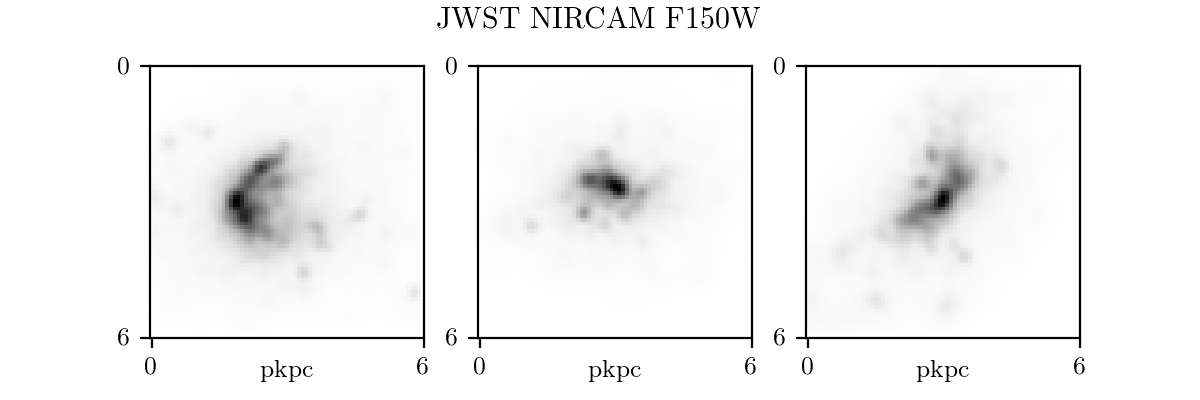

In [10]:
fig=cat.plot_galaxies('JWST','NIRCam','F150W')

Produce Figure 3, the three z=7 galaxies in all JWST filters in the catalogue

<IPython.core.display.Javascript object>


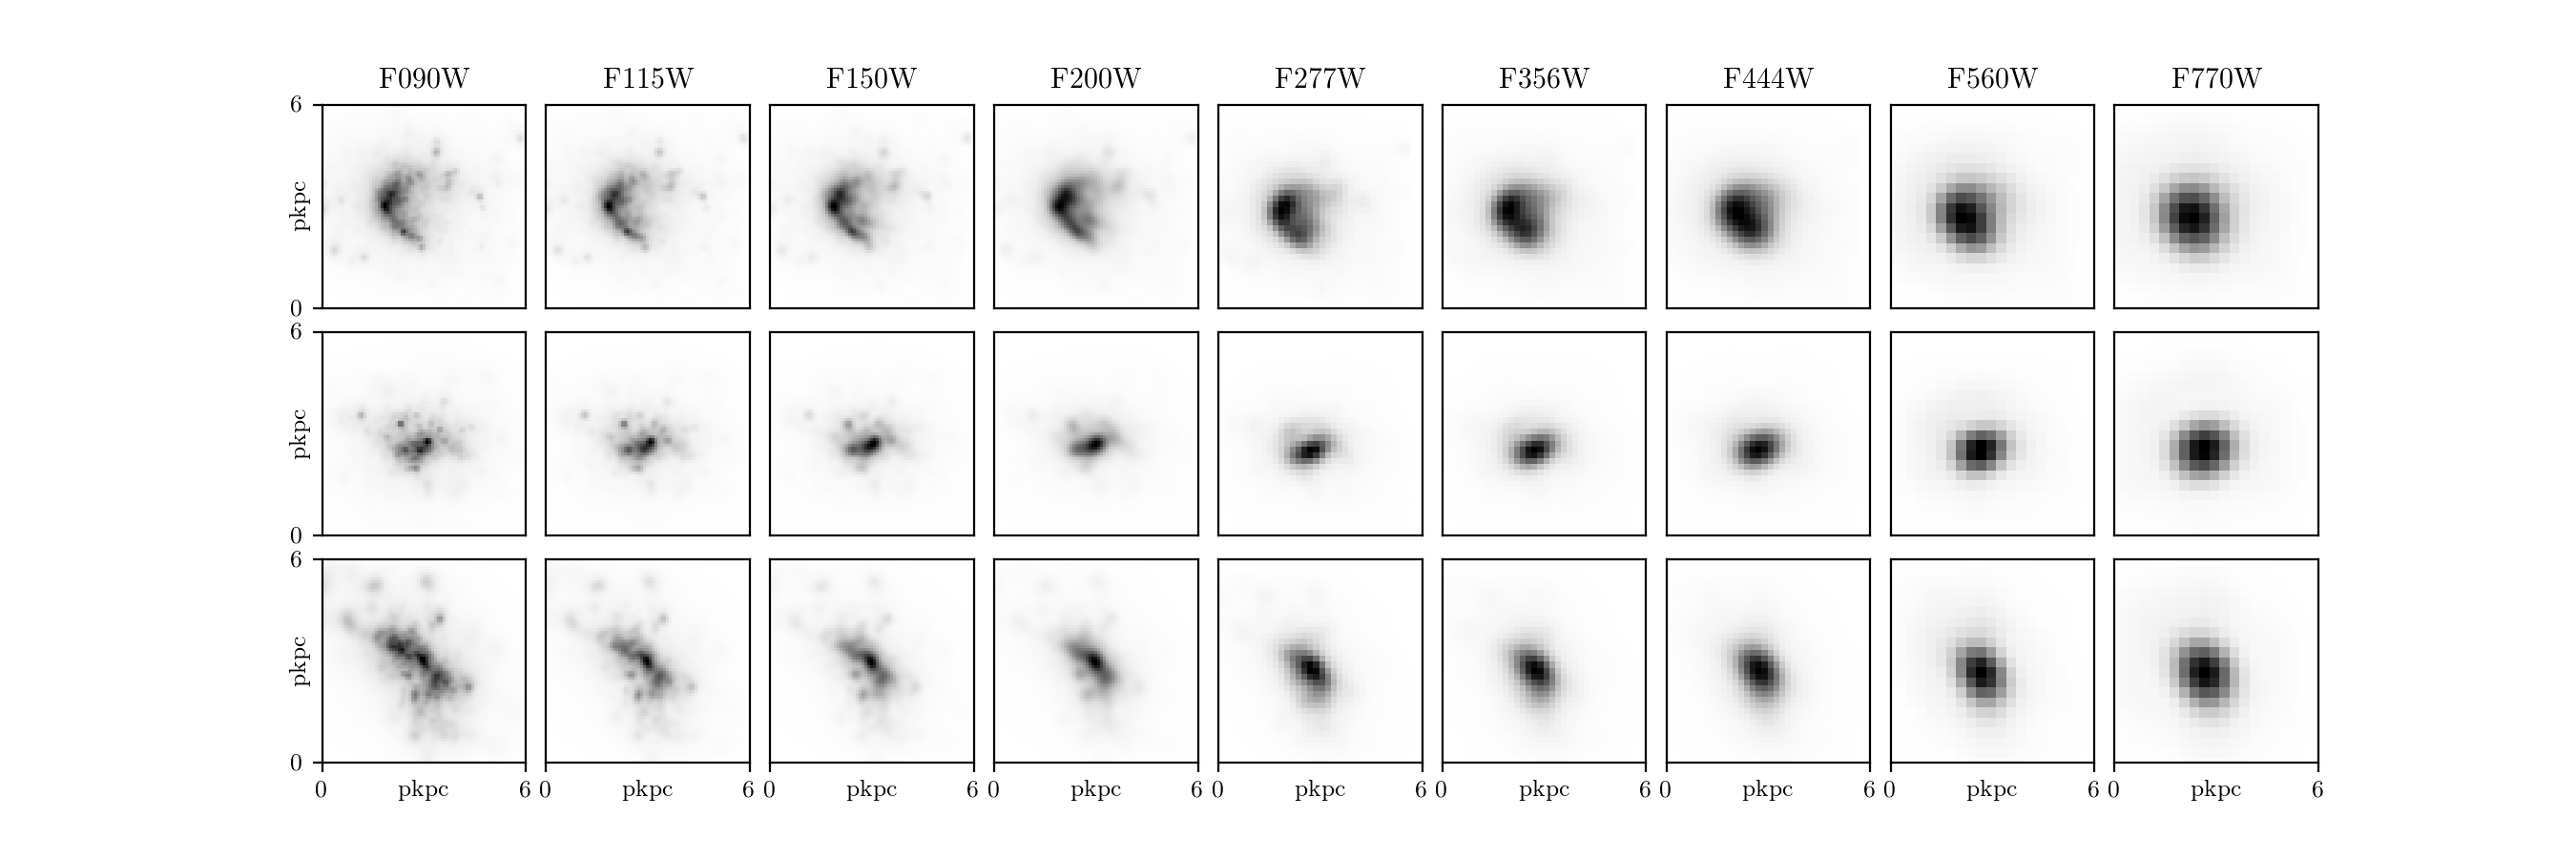

In [11]:
fig=cat.plot_galaxies('JWST','all','all')

<IPython.core.display.Javascript object>


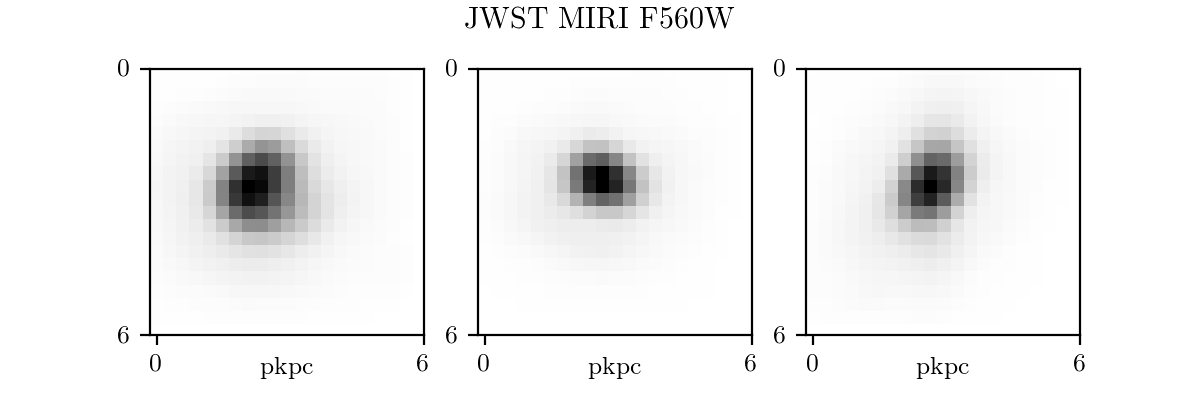

In [12]:
fig=cat.plot_galaxies('JWST','MIRI','F560W')

<IPython.core.display.Javascript object>


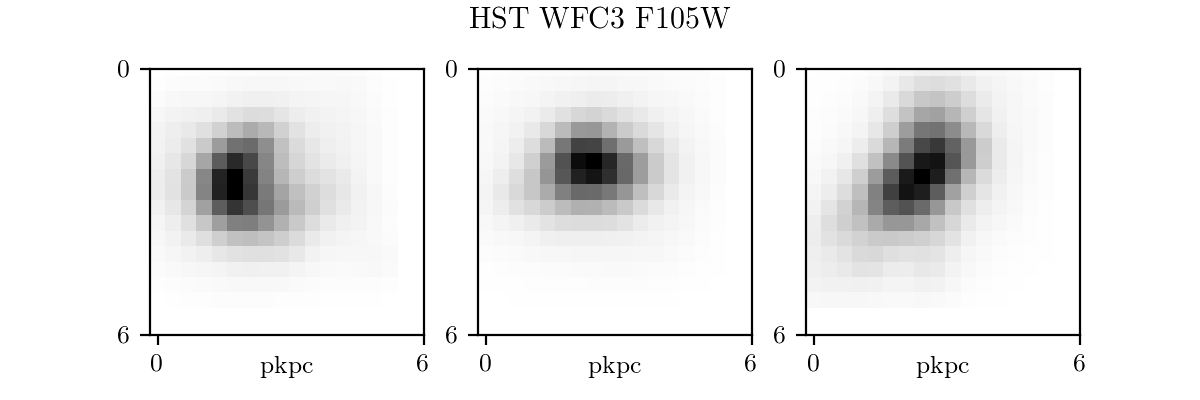

In [13]:
fig=cat.plot_galaxies('HST','WFC3','f105w')

<IPython.core.display.Javascript object>


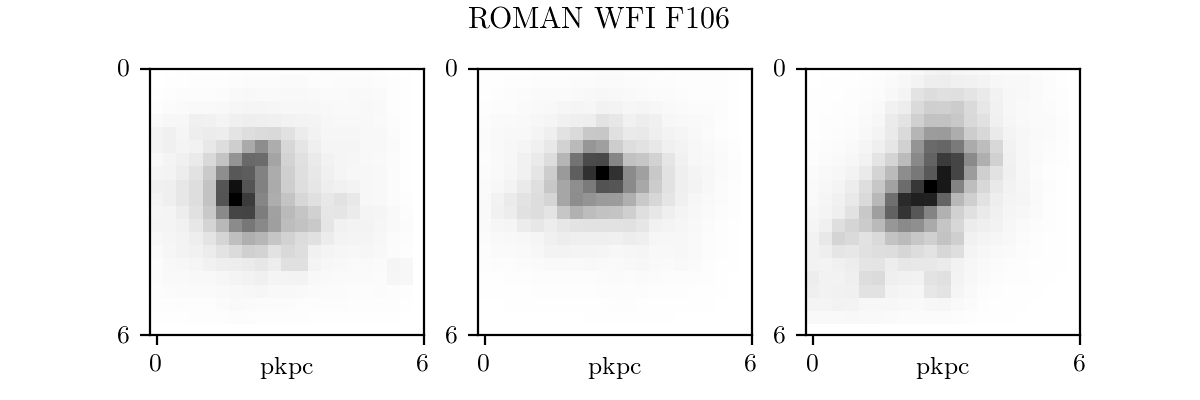

In [14]:
fig=cat.plot_galaxies('Roman','WFI','F106')


Produce Figure 2, the three z=7 galaxies in the Y-band of each telescope in the catalogue.

<IPython.core.display.Javascript object>


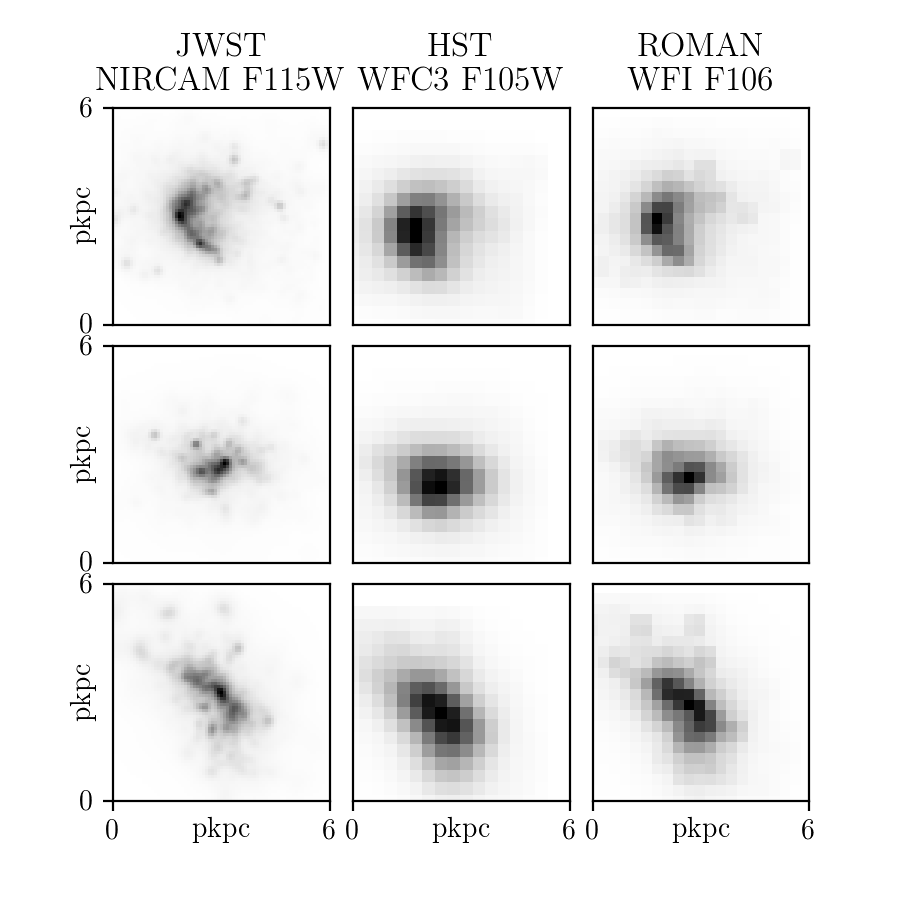

<IPython.core.display.Javascript object>


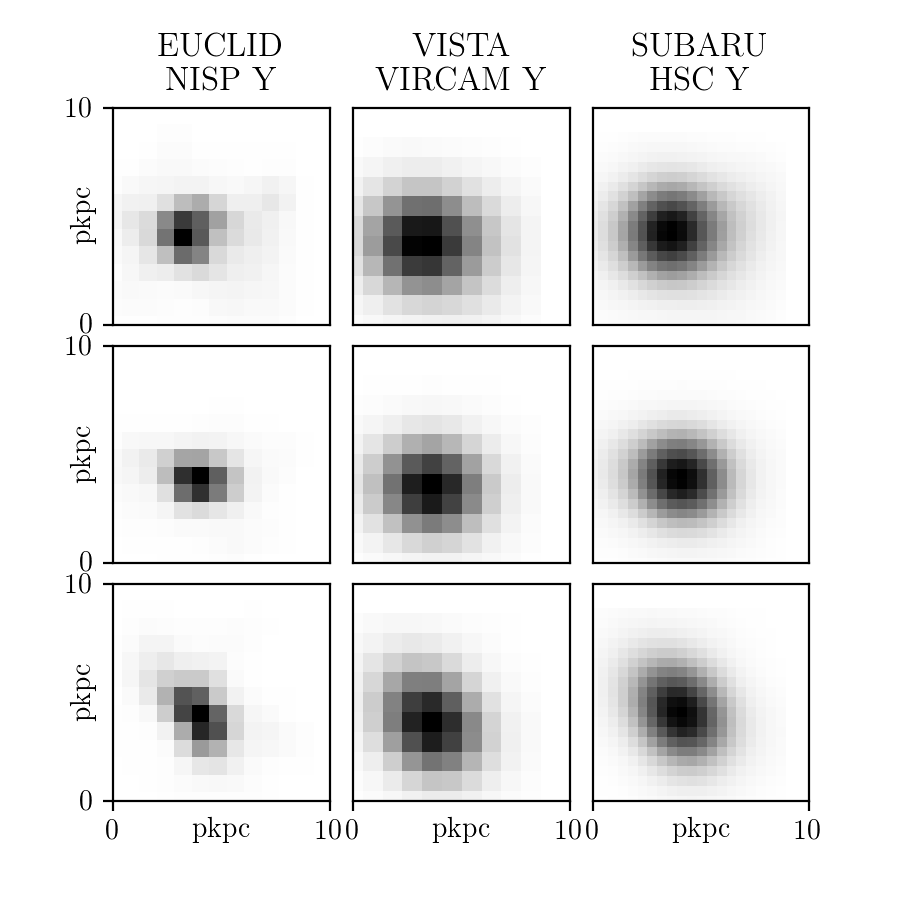

In [15]:
rcParams['font.size'] = (10)
fig,fig2=cat.plot_galaxies('ALL','ALL','Y')
#fig.savefig('plots/YbandImages_1.pdf')
#fig2.savefig('plots/YbandImages_2.pdf')